In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Define paths
dataset_path = "C:\\Users\\anish\\Downloads\\archive (2)"
training_path = os.path.join(dataset_path, "Training")
testing_path = os.path.join(dataset_path, "Testing")

# Define classes
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

# Load images and labels
X = []
Y = []
for cls in classes:
    for img_file in os.listdir(os.path.join(training_path, cls)):
        img_path = os.path.join(training_path, cls, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, (200, 200))  # Resize image
        X.append(img)  # Keep image in original shape
        Y.append(classes[cls])

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Normalize pixel values
X = X / 255.0

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

# Evaluate the CNN model
cnn_predictions = model.predict(xtest)
cnn_accuracy = accuracy_score(ytest, np.round(cnn_predictions))
cnn_precision = precision_score(ytest, np.round(cnn_predictions))
cnn_recall = recall_score(ytest, np.round(cnn_predictions))
cnn_f1 = f1_score(ytest, np.round(cnn_predictions))

# Train and evaluate the SVC model
svc = SVC()
svc.fit(xtrain.reshape(len(xtrain), -1), ytrain)  # Reshape for SVC model
svc_predictions = svc.predict(xtest.reshape(len(xtest), -1))
svc_accuracy = accuracy_score(ytest, svc_predictions)
svc_precision = precision_score(ytest, svc_predictions)
svc_recall = recall_score(ytest, svc_predictions)
svc_f1 = f1_score(ytest, svc_predictions)




Epoch 1/10
31/31 [==============================] - 17s 482ms/step - loss: 0.6939 - accuracy: 0.6847 - val_loss: 0.5261 - val_accuracy: 0.8000
Epoch 2/10
31/31 [==============================] - 14s 460ms/step - loss: 0.3390 - accuracy: 0.8680 - val_loss: 0.2625 - val_accuracy: 0.8735
Epoch 3/10
31/31 [==============================] - 14s 460ms/step - loss: 0.1469 - accuracy: 0.9468 - val_loss: 0.1643 - val_accuracy: 0.9184
Epoch 4/10
31/31 [==============================] - 14s 457ms/step - loss: 0.0882 - accuracy: 0.9703 - val_loss: 0.1893 - val_accuracy: 0.9224
Epoch 5/10
31/31 [==============================] - 14s 456ms/step - loss: 0.0422 - accuracy: 0.9887 - val_loss: 0.1183 - val_accuracy: 0.9673
Epoch 6/10
31/31 [==============================] - 14s 465ms/step - loss: 0.0263 - accuracy: 0.9928 - val_loss: 0.1657 - val_accuracy: 0.9510
Epoch 7/10
31/31 [==============================] - 14s 468ms/step - loss: 0.0138 - accuracy: 0.9980 - val_loss: 0.1185 - val_accuracy: 0.9714

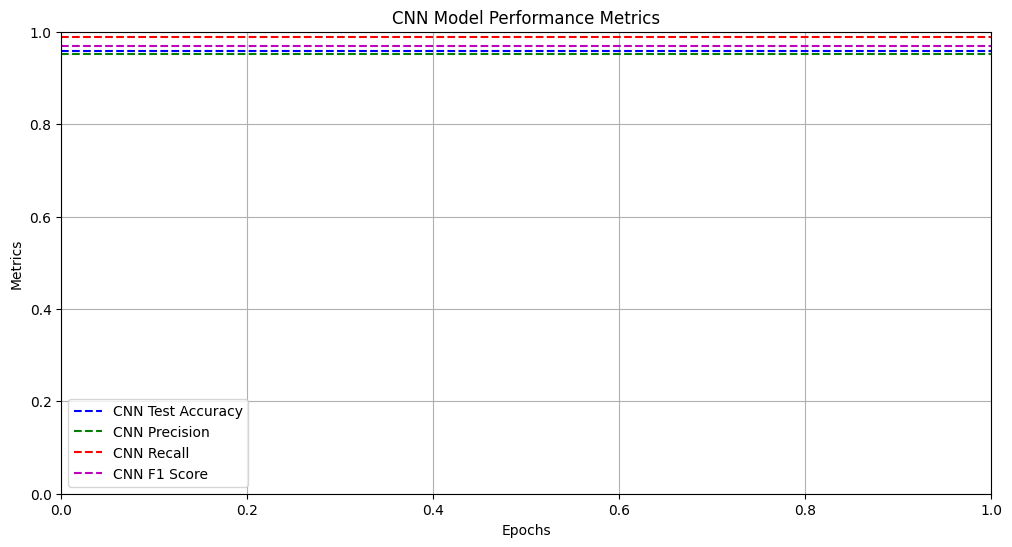

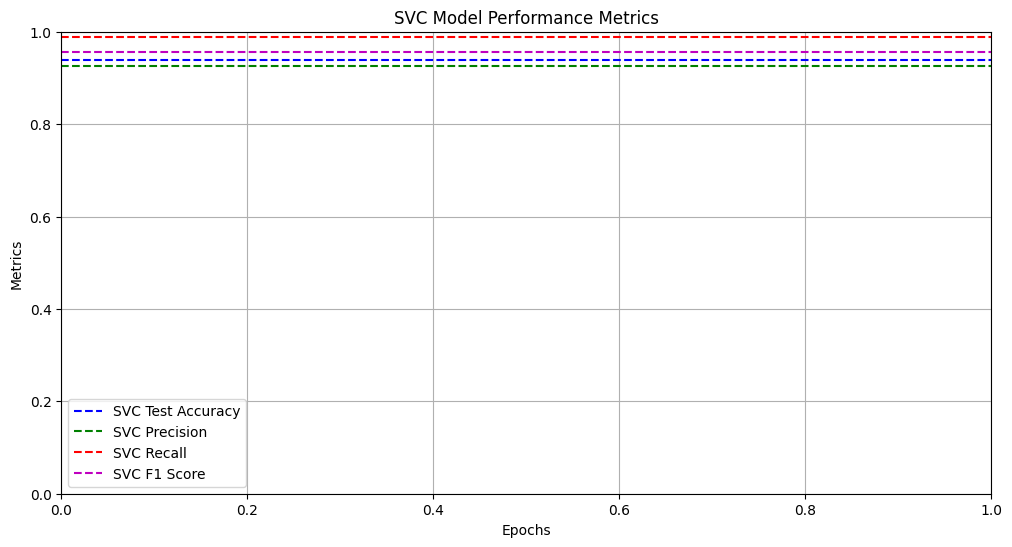

In [14]:
# Define epochs
epochs = range(1, 11)

# Plot CNN model metrics
plt.figure(figsize=(12, 6))
plt.axhline(y=cnn_accuracy, color='b', linestyle='--', label='CNN Test Accuracy')
plt.axhline(y=cnn_precision, color='g', linestyle='--', label='CNN Precision')
plt.axhline(y=cnn_recall, color='r', linestyle='--', label='CNN Recall')
plt.axhline(y=cnn_f1, color='m', linestyle='--', label='CNN F1 Score')
plt.title('CNN Model Performance Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Plot SVC model metrics
plt.figure(figsize=(12, 6))
plt.axhline(y=svc_accuracy, color='b', linestyle='--', label='SVC Test Accuracy')
plt.axhline(y=svc_precision, color='g', linestyle='--', label='SVC Precision')
plt.axhline(y=svc_recall, color='r', linestyle='--', label='SVC Recall')
plt.axhline(y=svc_f1, color='m', linestyle='--', label='SVC F1 Score')
plt.title('SVC Model Performance Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Print the metrics
print("CNN Model Metrics:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1 Score:", cnn_f1)
print("\nSVC Model Metrics:")
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1 Score:", svc_f1)

# Determine the best model
if cnn_accuracy > svc_accuracy:
    print("\nCNN Model is the best model based on Accuracy.")
elif cnn_accuracy < svc_accuracy:
    print("\nSVC Model is the best model based on Accuracy.")
else:
    print("\nBoth models have the same Accuracy.")


CNN Model Metrics:
Accuracy: 0.9591836734693877
Precision: 0.9523809523809523
Recall: 0.9876543209876543
F1 Score: 0.9696969696969697

SVC Model Metrics:
Accuracy: 0.9387755102040817
Precision: 0.9248554913294798
Recall: 0.9876543209876543
F1 Score: 0.9552238805970149

CNN Model is the best model based on Accuracy.


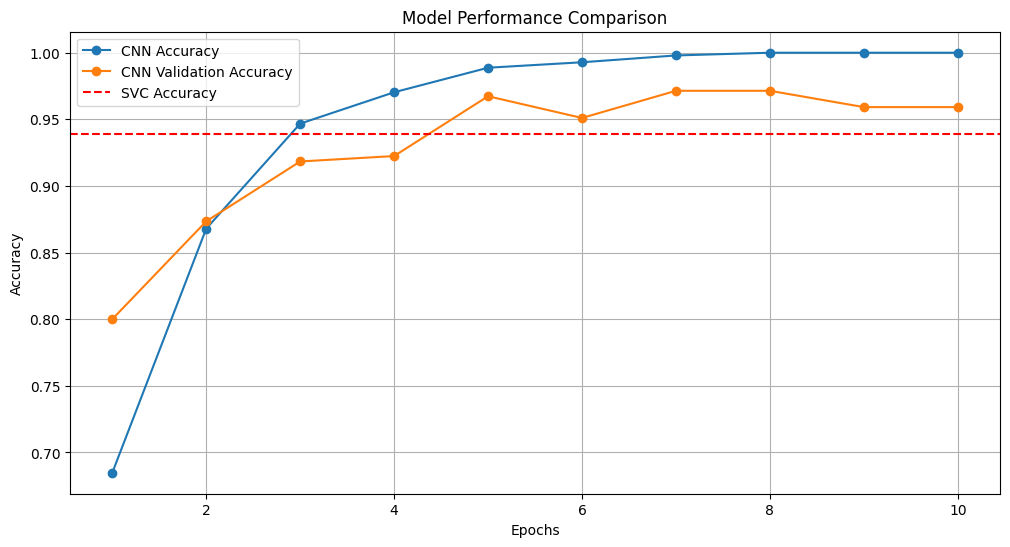

In [16]:
# Plot the comparison
epochs = range(1, 11)

plt.figure(figsize=(12, 6))

# Plot CNN model metrics
plt.plot(epochs, history.history['accuracy'], label='CNN Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='CNN Validation Accuracy', marker='o')

# Plot SVC model metrics
plt.axhline(y=svc_accuracy, color='r', linestyle='--', label='SVC Accuracy')

plt.title('Model Performance Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


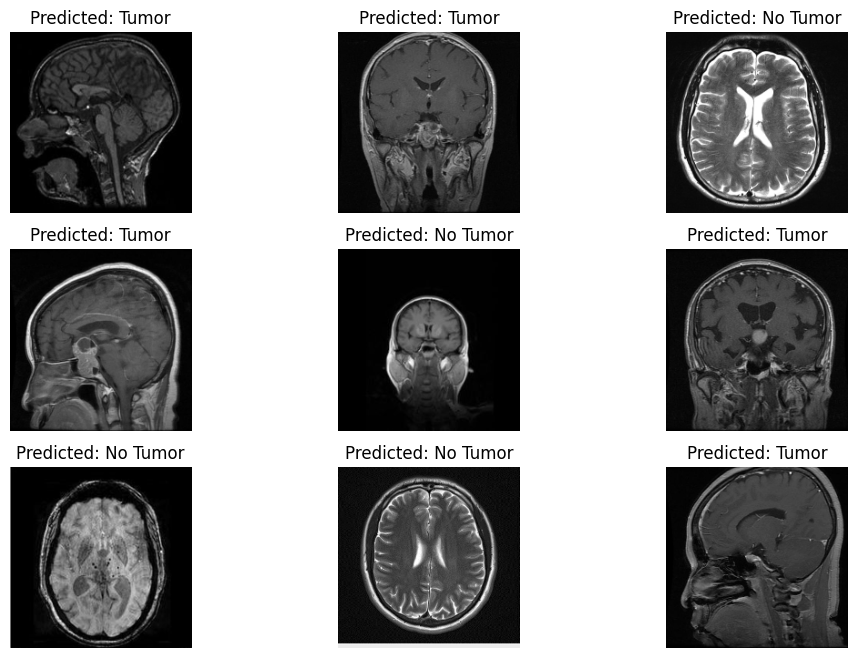

In [24]:
import random

# Select 9 random indices
random_indices = random.sample(range(len(xtest)), 9)

# Print 9 random sample test results using the CNN model
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    prediction = cnn_predictions[idx]
    image = xtest[idx].reshape(200, 200)  # Reshape image to original dimensions
    plt.subplot(3, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    if prediction >= 0.5:
        plt.title("Predicted: Tumor")
    else:
        plt.title("Predicted: No Tumor")
plt.show()

